## Pair Programming - Regresión logística 3 y 4

### Ajuste y Métricas

---

In [2]:
# Tratamiento de los datos
import pandas as pd
import numpy as np

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Testing
from sklearn.model_selection import train_test_split

#  Modelado, matriz de confusión y métricas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('../archivos/travel_balanceado.csv', index_col=0)
df.head()

,product_name,net_sales,commision_(in_value),continent,cat_age,cat_duration,net_sales_stand,commision_(in_value)_stand,agency_ADM,agency_ART,...,agency_TST,agency_TTW,agency_type_Airlines,agency_type_Travel Agency,distribution_channel_Offline,distribution_channel_Online,gender_F,gender_M,gender_PNS,claim
0,11,33.0,11.55,6,5,5,-0.194035,0.042042,0,0,...,0,0,1,0,0,1,1,0,0,0
1,11,56.0,19.60,6,6,8,0.261879,0.431373,0,0,...,0,0,1,0,0,1,0,1,0,0
2,11,22.0,7.70,6,6,8,-0.412081,-0.144159,0,0,...,0,0,1,0,0,1,1,0,0,0
3,8,23.0,9.20,6,5,6,-0.392259,-0.071613,0,0,...,0,0,1,0,0,1,0,0,1,0
4,14,72.0,0.00,6,6,7,0.579036,-0.516562,0,0,...,0,0,0,1,0,1,0,0,1,0


In [4]:
df_2 = pd.read_csv('../archivos/travel_enco_stand_sin_balanceo.csv', index_col=0)
df_2.head()

,product_name,claim,net_sales,commision_(in_value),continent,cat_age,cat_duration,net_sales_stand,commision_(in_value)_stand,agency_ADM,...,agency_SSI,agency_TST,agency_TTW,agency_type_Airlines,agency_type_Travel Agency,distribution_channel_Offline,distribution_channel_Online,gender_F,gender_M,gender_PNS
0,3,0,-29.0,9.57,6,3,5,-1.423021,-0.053718,0,...,0,0,0,0,1,1,0,1,0,0
1,3,0,-29.0,9.57,6,3,5,-1.423021,-0.053718,0,...,0,0,0,0,1,1,0,1,0,0
2,12,0,-49.5,29.70,4,5,8,-1.829379,0.919850,0,...,0,0,0,0,1,0,1,0,0,1
3,12,0,-39.6,23.76,4,5,8,-1.633138,0.632567,0,...,0,0,0,0,1,0,1,0,0,1
4,12,0,-19.8,11.88,5,6,8,-1.240655,0.058003,0,...,0,0,0,0,1,0,1,0,0,1


Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:
- Realizar el ajuste o ajustes de los modelos
- Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

In [5]:
# Modelo con las variables predictoras ESTANDARIZADAS y la variable respuesta SIN BALANCEAR
df_stand_sin_bal = df_2.drop(['net_sales', 'commision_(in_value)'], axis= 1)

### 1. Modelo con las variables predictoras ESTANDARIZADAS y la variable respuesta BALANCEADA

In [6]:
df_stand_bal = df.drop(['net_sales', 'commision_(in_value)'], axis= 1)

In [7]:
# separamos los datos en X e y

X1 = df_stand_bal.drop("claim", axis = 1)
y1 = df_stand_bal["claim"]

In [8]:
# comprobamos las variables predictoras
X1.head()

,product_name,continent,cat_age,cat_duration,net_sales_stand,commision_(in_value)_stand,agency_ADM,agency_ART,agency_C2B,agency_CBH,...,agency_SSI,agency_TST,agency_TTW,agency_type_Airlines,agency_type_Travel Agency,distribution_channel_Offline,distribution_channel_Online,gender_F,gender_M,gender_PNS
0,11,6,5,5,-0.194035,0.042042,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,11,6,6,8,0.261879,0.431373,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,11,6,6,8,-0.412081,-0.144159,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
3,8,6,5,6,-0.392259,-0.071613,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,14,6,6,7,0.579036,-0.516562,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [9]:
# comprobamos la variable respuesta

y1.head()

0    0
1    0
2    0
3    0
4    0
Name: claim, dtype: int64

In [10]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

### Ajuste de nuestro modelo

In [11]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [12]:
train_df_esta = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train1)})
test_df_esta  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.head()

,Real,Predicted,Set
3790,0,0,Train
22095,0,0,Train
26782,1,0,Train
37168,0,0,Train
4237,0,0,Train


### Matriz de Confusión

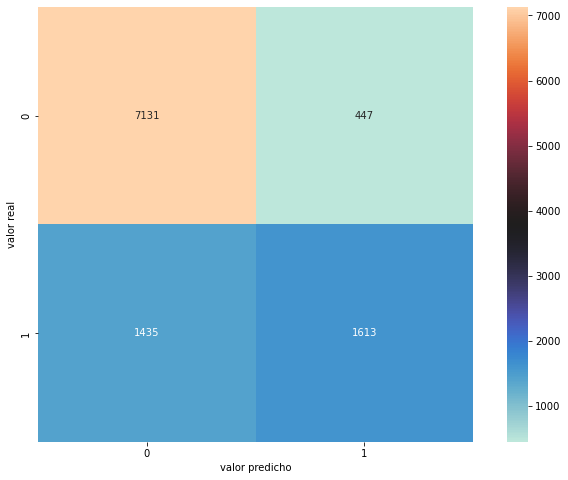

In [13]:
mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "icefire")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

➡️ **_Conclusiones:_**

0: No reclaman el seguro

1: Si reclaman

- VP: El número 7131, corresponde al número de personas que no reclaman y si hemos predicho.
- VN: El número 1613, corresponde al número de personas que si reclaman y si hemos predicho.
- FP: El número 1435, corresponde al número de personas que si han reclamado y no hemos predicho.
- FN: El número 447, corresponde al número de personas que no reclaman y no hemos predicho. 




In [14]:
# Sacamos las métricas

def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [15]:
resultados_logistic_stand_bal = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Regresión logistica Stan_Bal")
resultados_logistic_stand_bal

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.822887,0.783010,0.529199,0.631558,0.520657,test,Regresión logistica Stan_Bal
1,0.823777,0.792815,0.515988,0.625125,0.516585,train,Regresión logistica Stan_Bal


➡️ **_Conclusiones:_**

Vemos que tenemos: 
- un accuracy y precision altos.
- un f1 considerablemente alto aunque mejorable.
- un kappa que nos indica que tenemos casi la mitad de prediciones aleatorias.

Nos interesaría subir el recall ya que en nuestro caso nos interesa tener más posibilidad de error con los FN, las personas que no reclaman y no hemos predicho.



### 2. Módelo con las variables predictoras SIN ESTANDARIZAR y la variable respuesta SIN BALANCEAR

In [16]:
df_sin_stand_sin_bal = df_2.drop(['net_sales_stand', 'commision_(in_value)_stand'], axis= 1)

In [17]:
# separamos los datos en X e y

X2 = df_sin_stand_sin_bal.drop("claim", axis = 1)
y2 = df_sin_stand_sin_bal["claim"]

In [18]:
# separamos en train y test
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [19]:
# ajuste y prediccion del modelo

# definimos la regresión logistica

log_reg_esta2 = LogisticRegression(n_jobs=-1, max_iter = 2000)

# ajustamos el modelo
log_reg_esta2.fit(x_train2,y_train2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta2 = log_reg_esta2.predict(x_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta2 = log_reg_esta2.predict(x_test2)

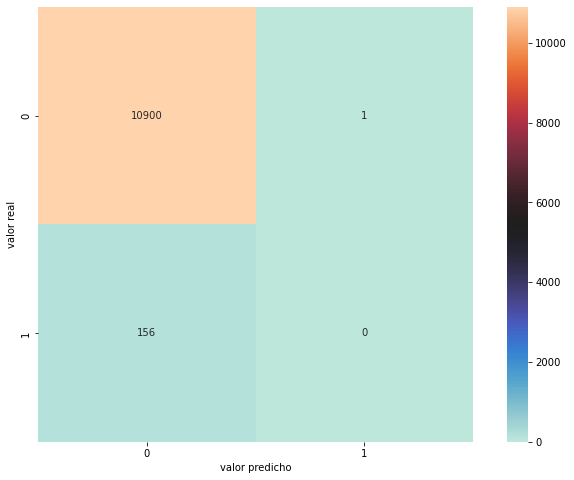

In [20]:
# Matriz de confusión
mat_lr_esta2 = confusion_matrix(y_test2, y_pred_test_esta2)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_esta2, square=True, annot=True, fmt="d", cmap = "icefire")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [21]:
results_logistic_sin_stand_bal = metricas(y_test2, y_pred_test_esta2, y_train2, y_pred_train_esta2, "Regresión logistica Sin Stan-Bal")
results_logistic_sin_stand_bal

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.985801,0.0,0.0,0.0,-0.000180,test,Regresión logistica Sin Stan-Bal
1,0.982635,0.0,0.0,0.0,-0.000135,train,Regresión logistica Sin Stan-Bal


### 3. Módelo con las variables predictoras SIN ESTANDARIZAR y la variable respuesta BALANCEADA

In [22]:
df_sin_stand_con_bal = df.drop(['net_sales_stand', 'commision_(in_value)_stand'], axis= 1)

In [23]:
# separamos los datos en X e y

X3 = df_sin_stand_con_bal.drop("claim", axis = 1)
y3 = df_sin_stand_con_bal["claim"]

In [24]:
# separamos en train y test
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

In [25]:
# ajuste y prediccion del modelo

# definimos la regresión logistica

log_reg_esta3 = LogisticRegression(n_jobs=-1, max_iter = 3000)

# ajustamos el modelo
log_reg_esta3.fit(x_train3,y_train3)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta3 = log_reg_esta3.predict(x_train3)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta3 = log_reg_esta3.predict(x_test3)

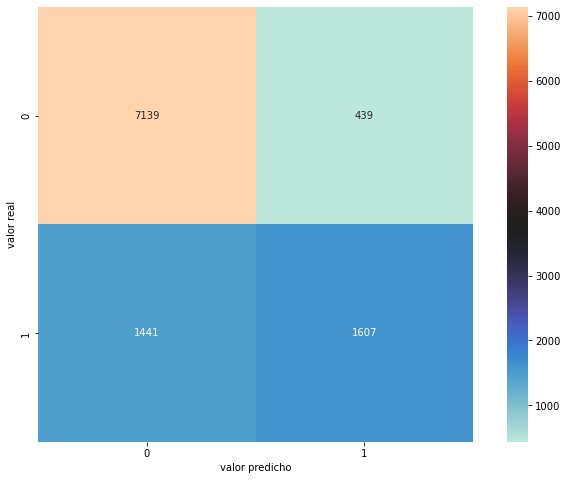

In [26]:
# Matriz de confusión
mat_lr_esta3 = confusion_matrix(y_test3, y_pred_test_esta3)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_esta3, square=True, annot=True, fmt="d", cmap = "icefire")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [27]:
results_logistic_sin_stand_con_bal = metricas(y_test3, y_pred_test_esta3, y_train3, y_pred_train_esta3, "Regresión logistica Sin Stan Con Bal")
results_logistic_sin_stand_con_bal

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.823075,0.785435,0.527231,0.630938,0.520437,test,Regresión logistica Sin Stan Con Bal
1,0.823307,0.793783,0.512683,0.622992,0.514485,train,Regresión logistica Sin Stan Con Bal


In [28]:
# Unimos en un dataframe todos los resultados

resultados_todo = pd.concat([resultados_logistic_stand_bal, results_logistic_sin_stand_bal, results_logistic_sin_stand_con_bal], axis = 0)
resultados_todo

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.822887,0.783010,0.529199,0.631558,0.520657,test,Regresión logistica Stan_Bal
1,0.823777,0.792815,0.515988,0.625125,0.516585,train,Regresión logistica Stan_Bal
0,0.985801,0.000000,0.000000,0.000000,-0.000180,test,Regresión logistica Sin Stan-Bal
1,0.982635,0.000000,0.000000,0.000000,-0.000135,train,Regresión logistica Sin Stan-Bal
0,0.823075,0.785435,0.527231,0.630938,0.520437,test,Regresión logistica Sin Stan Con Bal
1,0.823307,0.793783,0.512683,0.622992,0.514485,train,Regresión logistica Sin Stan Con Bal


**_Conclusiones:_**

- El segundo caso, sin estandarizar y sin balancear, fracaso absoluto.

- El primer y tercer modelo vemos que son los más acertados, dentro de que no son muy precisos ya que tienen un kappa de 0.52.

- Estos modelos son los que están con la variable respuesta balanceada y las variables predictoras numéricas están en uno de los casos estandarizadas y en el otro sin estandarizar.

In [30]:
resultados_todo.to_csv("../archivos/resultados_travel_logistica.csv")